In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Suicides in India 2001-2012.csv")

In [4]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [10]:
print("The number of rows in the dataset are :{}\nThe number of columns in the dataset are :{}".format(df.shape[0],df.shape[1]))

The number of rows in the dataset are :237519
The number of columns in the dataset are :7


In [12]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [13]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [16]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

There are no missing values in this dataset

In [17]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [19]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [20]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [21]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [22]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [23]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [25]:
df['Total'].unique()

array([   0,    1,    8, ..., 3927, 1513, 5451], dtype=int64)

In [28]:
#Removing the values from the column 'State' and making new dataframe, 'statewise_df'

statewise_df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [30]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total']==0].index)

In [32]:
#Renaming the 'Type' which has almost same meaning
statewise_df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)

In [33]:
statewise_df = statewise_df.set_index(pd.Index([i for i in range(0,101110)]))
statewise_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
101105,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
101106,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
101107,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
101108,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [38]:
sns.set_style('darkgrid')
#We use rc i.e a runtime configuration (rc) containing the default styles for every plot element you create
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Q.1. Yearwise Total Number Of Deaths

Ans: The pattern in number of suicides has shown a steady surge as the years pass by, reaching the peak in 2011. In 2012, the number of suicides decreased by a good margin

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


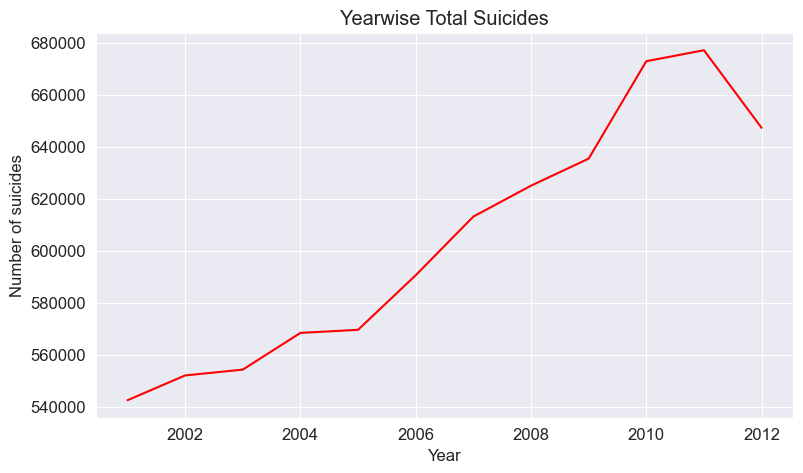

In [40]:
#Creating a series of total suicides according to year

yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

Q2. Statewise Number Of Suicides  - use bar graph

Ans: Maharashtra has recorded the highest number of suicides and Lakshwadeep has the lowest.

Total number of suicides in each State:  State
Maharashtra          901945
West Bengal          849936
Tamil Nadu           818691
Andhra Pradesh       814059
Karnataka            734825
Kerala               538946
Madhya Pradesh       451535
Gujarat              330858
Chhattisgarh         302354
Odisha               267234
Rajasthan            255134
Uttar Pradesh        233352
Assam                172276
Haryana              147176
Delhi (Ut)            84272
Jharkhand             49720
Punjab                46350
Bihar                 46214
Tripura               45965
Puducherry            32144
Himachal Pradesh      26562
Uttarakhand           18496
Goa                   17363
Jammu & Kashmir       14821
Sikkim                 9606
A & N Islands          8109
Arunachal Pradesh      6633
Meghalaya              5415
Chandigarh             5164
Mizoram                4154
D & N Haveli           3430
Manipur                2102
Nagaland               1728
Daman & Diu            1391
L

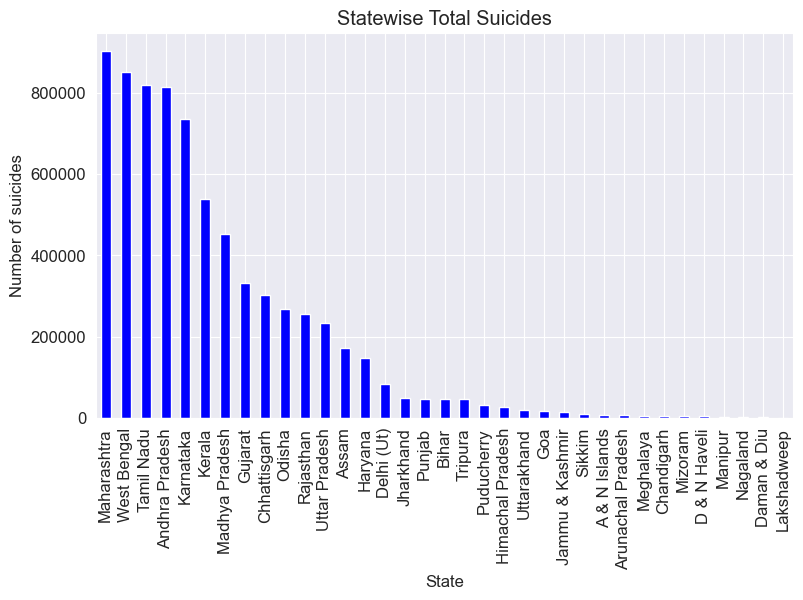

In [48]:
#Creating a series of total suicides according to state

statewise_total_suicide = statewise_df.groupby("State")["Total"].sum().sort_values(ascending=False)
print('Total number of suicides in each State: ', statewise_total_suicide)

#plotting this in a bar graph
statewise_total_suicide.plot(kind="bar", figsize = (9,5), color = 'b')
plt.title('Statewise Total Suicides')
plt.xlabel('State')
plt.ylabel('Number of suicides');

Q3. Suicides According To The Causes In Each Year

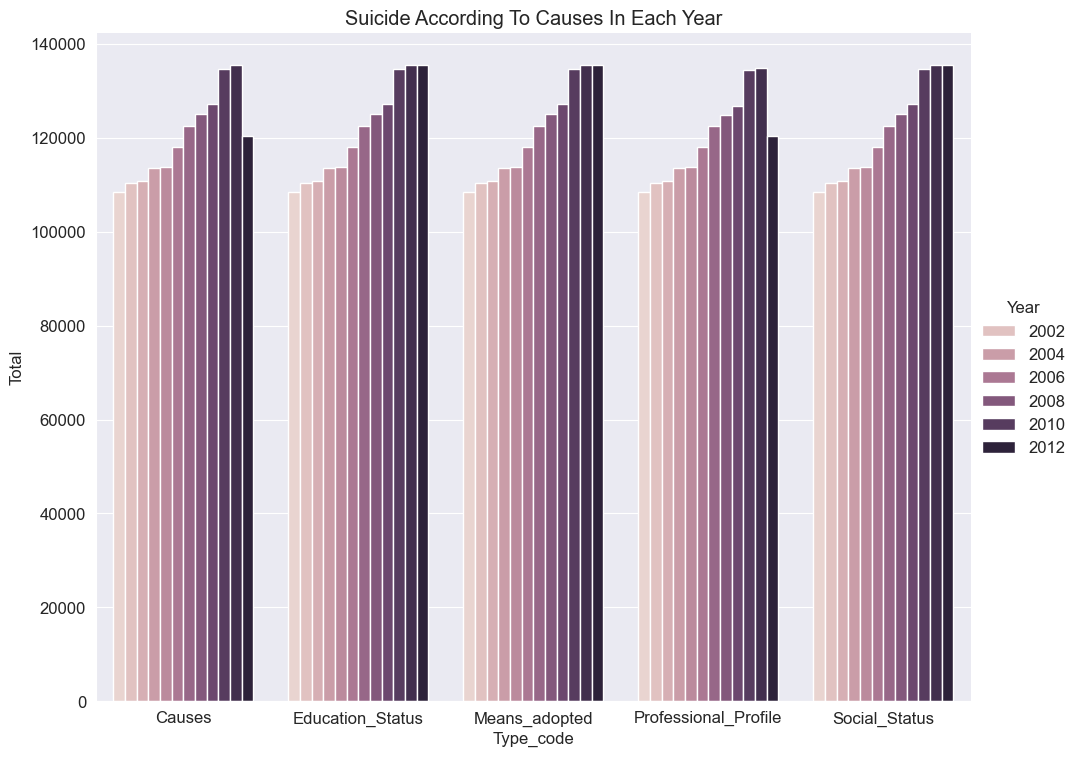

In [67]:
#Filtering the data according to 'type_code','Total' and 'Year'
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5);
plt.title('Suicide According To Causes In Each Year');

Q4. Suicide According To Gender

Ans: Although there isn’t a significant difference between genders, it is evident that males have committed suicide more frequently than females.

Gender
Male      54841
Female    46269
Name: count, dtype: int64


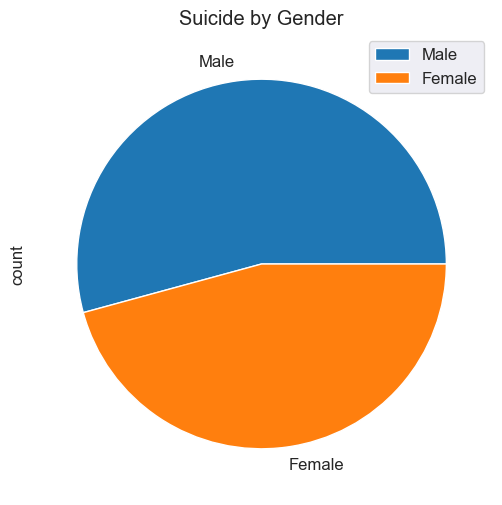

In [62]:
#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

Q5. Suicides By The Educational Background

Ans: Suicides are more prevalent among individuals with lower education levels, particularly those with no education or only primary schooling. The numbers decrease as the education level increases.

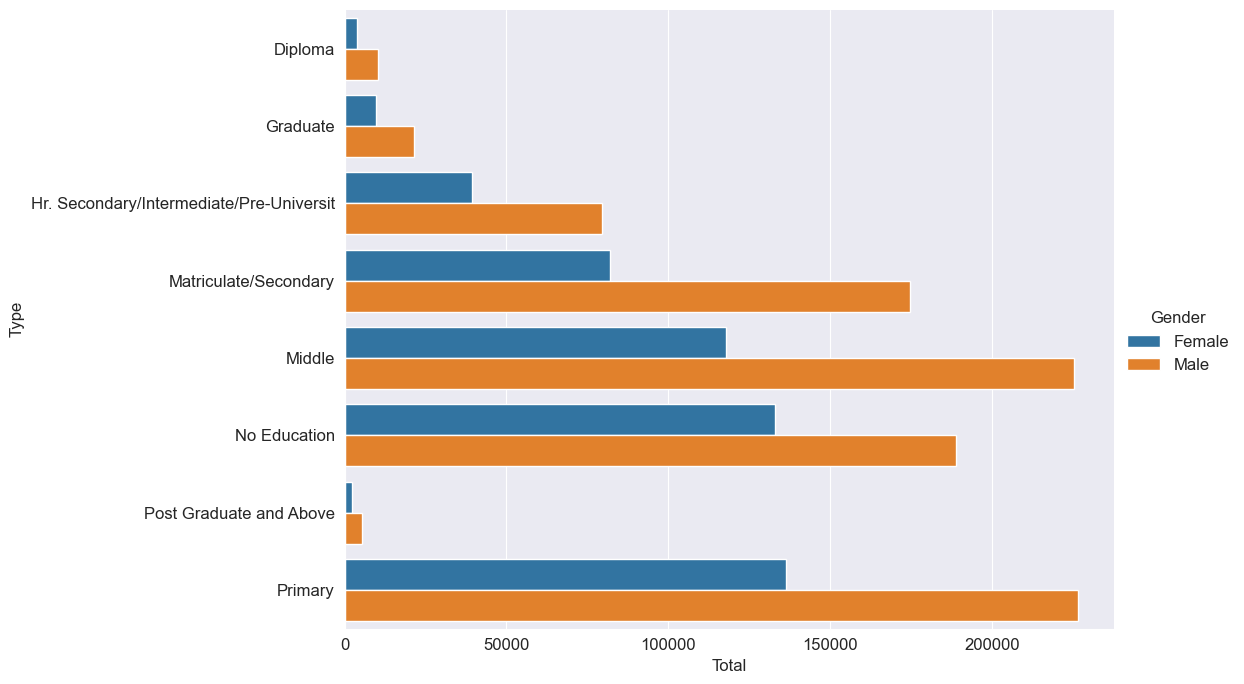

In [68]:
#filtering the data as per the educational background
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

Q6. Suicides By Social Status

Ans: Suicides are highest among married individuals, followed by those who have never married. The numbers are significantly lower for divorcees, separated individuals, and widowed/widowers. Males have a higher suicide rate than females across all marital statuses.

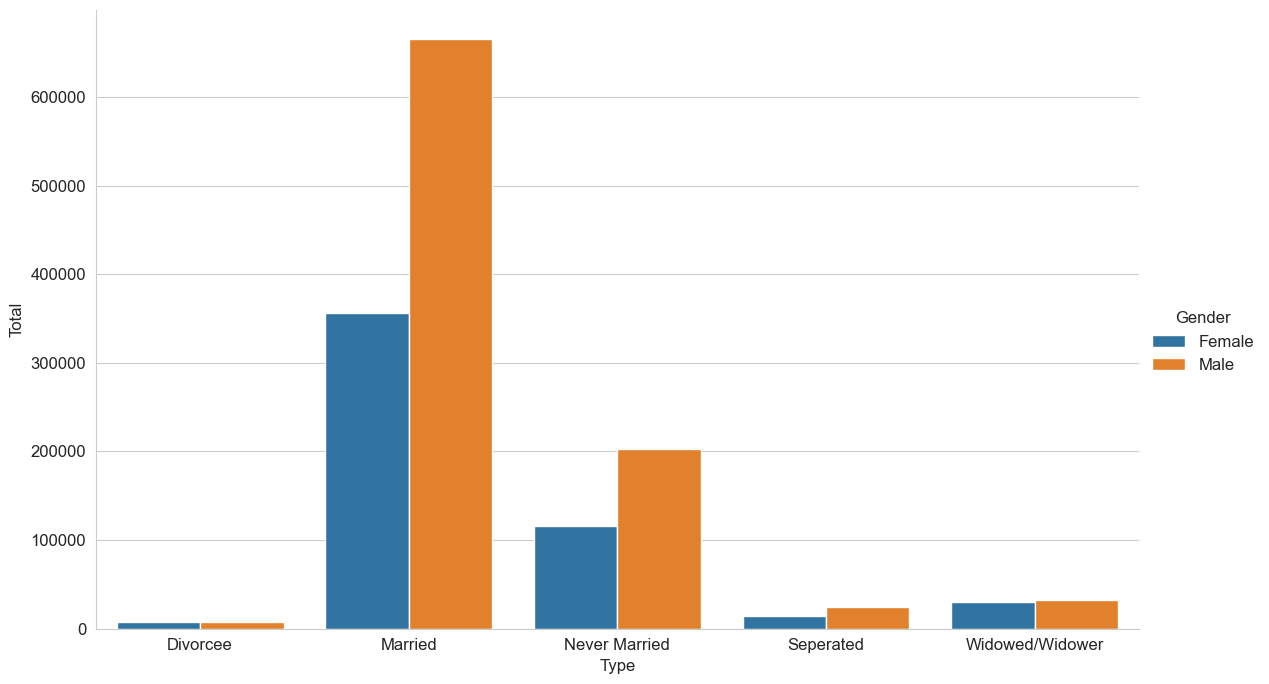

In [70]:
#filtering the data as per the educational background
social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
social_status

#plotting the above data
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=social_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

Q7. Suicides By Age Groups

Ans: The age distribution chart shows that suicides are most prevalent among individuals aged 15-29, followed closely by the 30-44 age group. The numbers decline in older age groups, with the lowest suicide rates observed in children (0-14) and seniors (60+).

Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


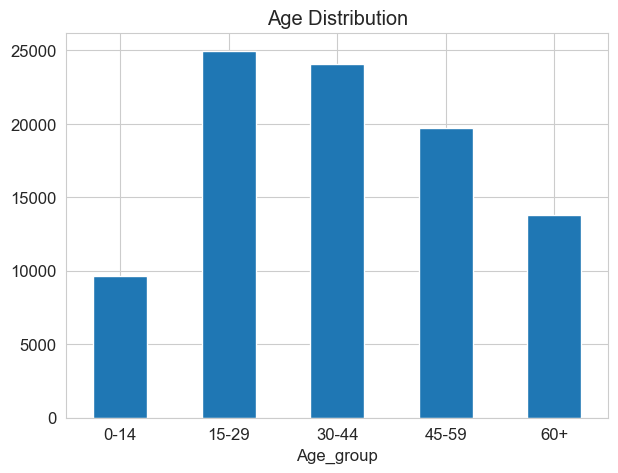

In [73]:
#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

Q8. People of which professional background has committed more suicides?

Ans: According to available information, housewives and people engaged in farming activities tend to commit more suicides.

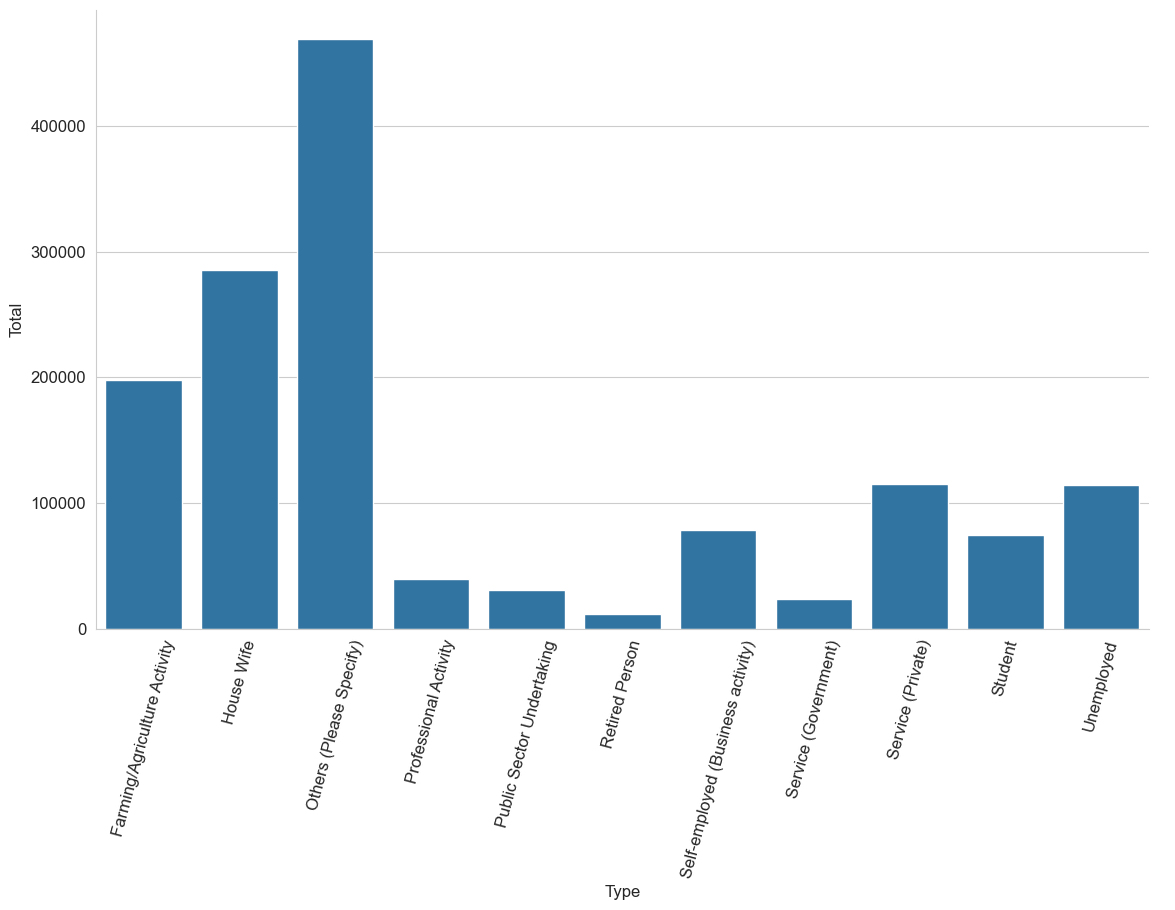

In [77]:
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Professional_Profile"].groupby(["Type"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);
g.set_xticklabels(rotation=75);

Inferences and Conclusion:
According to the above analysis, we can conclude the following things:
1. Males tend to commit more suicides compared to Females in India
2. The highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.
3. If the trend continues the number of suicides will increase in the future.

**People who commit suicide are mostly:
1. Married
2. Farmers and housewives
3. Youngsters (15-29 age) and middle-aged (30-44)
4. Don't have proper or any professional education